# Coefficients of the profle caused by Size effects

Following Gubicza 2014, we first define the variable 
$$
\kappa = \frac{2\sin \theta}{\lambda},
$$

where $\theta$ is the scattering angle, $\lambda$ is the X-ray wavelength. For a face centered cubic (FCC) lattice, the intensity profile, in Fourier space, associated to size effects is given as

$$
A_S(L) =  e^{2\pi\left(F_{hkl} \frac{|L|}{2} + L \Delta_{hkl}\right)},
$$

where $F_{hkl}$ is the full-width at half maximum associated to the peak with Miller-indices $h,k,l$ and $\Delta $ is the shift relative to the Bragg position. The variable $L$ is related to $\kappa$ through the Fourier-transform

$$
I(\kappa) = \int_{-\infty}^\infty I(L)e^{2\pi i\kappa L }dL.
$$

The full width at half maximum depends on whether (either intrinsic or extrinsic) _stacking faults_ or _twin boundaries_ are present in the material. For stacking faults, we have

$$
F_{hkl} = \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\log \frac{1}{1-3\alpha + 3\alpha^2},
$$
where $\alpha\in[0,1)$ is the probability of stacking faults and $a$ is the lattice constant. For twin boundaries, we have

$$
F_{hkl} = \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\frac{2\beta}{\sqrt{1-\beta}},
$$
where $\beta\in [0,1)$ is the probability of twin boundaries.


The deviation from the Bragg position can be expressed as

$$
\Delta_{hkl} = \pm \frac{1}{3a}\frac{|h+k+l|}{\sqrt{h^2 + k^2 + l^2}}\left[\arctan \left(\sqrt{3}(1-2\alpha) \right) -\frac{\pi}{3} \right],
$$

where the positive sign corresponds to intrinsic faults and the negative corresponds to extrinsic faults. Note that $\Delta \neq 0$ only for stacking faults. Moreover, $I(\kappa) = \text{const.}$ for BCC and SC lattices.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fftfreq, fft, ifft, ifftshift, fftshift
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
import matplotlib

In [3]:
%load_ext autoreload
%autoreload 2
%aimport  diffaultpy

In [4]:
from diffaultpy.peak_shapes import Peak, generate_multiple_peaks


In [5]:
N = 1024 * 8 


Here we initialize a Peak object

with the following properties:

$$a =0.36, b =0.255, C_{h00}=0.1. $$


The computational domain will correspond to $\kappa \in [0, \kappa_{max}]$ with $\kappa_{max}=14$. 

In [6]:
lattice_constant = 0.36



## Full width at half maximum



The width of a peak with given indices $h=2$, $k=l=0$ is determined by the planar fault probability. Let us compare stacking faults and twin faults with increasing fault probability.



In [7]:
h, k, l = 3, -1, -1
single_peak_stacking_fault = Peak(14, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
single_peak_twin = Peak(14, N, 0.1, 0.255, lattice_constant, stacking_or_twin_fault='twin')

planar_fault_probabilities = np.linspace(0,0.99, 200)
fwhm_stacking = single_peak_stacking_fault._full_width_half_max(lattice_constant, h, k, l, planar_fault_probabilities)
fwhm_twin = single_peak_twin._full_width_half_max(lattice_constant, h, k, l, planar_fault_probabilities)


(0.0, 6.5)

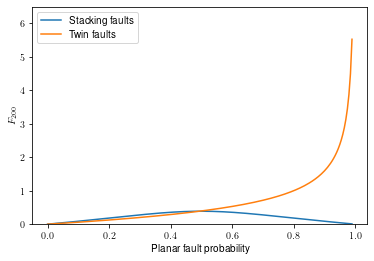

In [8]:
plt.figure(figsize = (6,4))
plt.plot(planar_fault_probabilities, fwhm_stacking, label = 'Stacking faults')
plt.plot(planar_fault_probabilities, fwhm_twin, label = 'Twin faults')
plt.xlabel('Planar fault probability')
plt.ylabel('$F_{200}$')
plt.legend()
plt.ylim(0,6.5)

## Shift from the Bragg-position

For stacking faults, we can also evaluate the shift for the same peak.


In [9]:
delta_stacking_intrinsic = single_peak_stacking_fault._delta_hkl(lattice_constant, h, k, l,
                                                       planar_fault_probabilities,
                                                  intrinsic_or_extrinsic = 'intrinsic')
delta_stacking_extrinsic = single_peak_stacking_fault._delta_hkl(lattice_constant, h, k, l,
                                                       planar_fault_probabilities,
                                                  intrinsic_or_extrinsic = 'extrinsic')


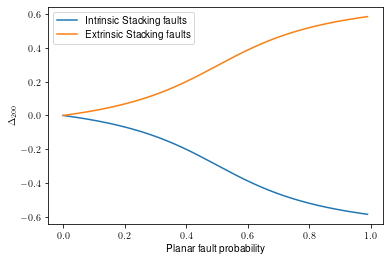

In [11]:
plt.figure(figsize = (6,4))
plt.plot(planar_fault_probabilities, delta_stacking_intrinsic, label = 'Intrinsic Stacking faults')
plt.plot(planar_fault_probabilities, delta_stacking_extrinsic, label = 'Extrinsic Stacking faults')

plt.xlabel('Planar fault probability')
plt.ylabel('$\Delta_{200}$')
plt.legend()

## Evaluating the planar fault profiles 

Now we compute the profile with varying fault probabilities

Text(0.5, 1.0, 'Intrinsic faults')

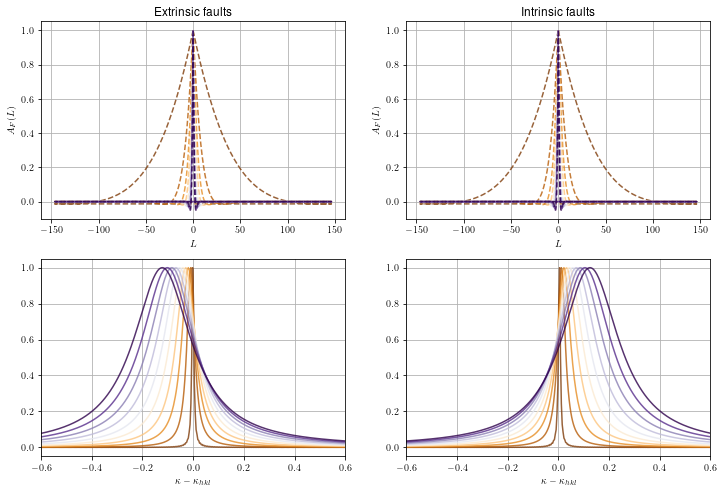

In [12]:
b_s = np.linspace(0.01, 0.3, 10)

norm = matplotlib.colors.Normalize(
    vmin=0.01,
    vmax=0.3)

colormap = matplotlib.cm.PuOr
scalar_mappable_colormap = matplotlib.cm.ScalarMappable(cmap=colormap, norm=norm)
scalar_mappable_colormap.set_array([])

single_peak_stacking_fault = Peak(14, N, 1, 0.255, lattice_constant, stacking_or_twin_fault='stacking')
lengthOfFrame = 2 * single_peak_stacking_fault.max_range_diffraction_vector
L = single_peak_stacking_fault.math.fftfreq(single_peak_stacking_fault.Nfourier, 
                                            lengthOfFrame / single_peak_stacking_fault.Nfourier).reshape(-1, 1) + 1e-16
N = len(L)
dell = L[1,:] - L[0,:]
factor = dell * N # normalization factor for the Fourier transform


fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


for b in b_s:
    ft_stackfault_ex = single_peak_stacking_fault.fourier_coefficients_planar_fault(L, b, h, k, l, intrinsic_or_extrinsic = 'extrinsic')
    profile = np.abs(single_peak_stacking_fault.math.ifftshift(single_peak_stacking_fault.math.ifft ( ft_stackfault_ex, axis = 0), axes =0)) * factor
    max_value =  np.max(profile)
    ax1.plot(L, np.real(ft_stackfault_ex), '--', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#
    ax3.plot(single_peak_stacking_fault.diffraction_vectors, profile / max_value, '-', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#
    ft_stackfault_in = single_peak_stacking_fault.fourier_coefficients_planar_fault(L, b, h, k, l, intrinsic_or_extrinsic = 'instrinsic')
    profile = np.abs(single_peak_stacking_fault.math.ifftshift(single_peak_stacking_fault.math.ifft ( ft_stackfault_in, axis = 0 ), axes =0)) * factor
    max_value = np.max(profile)
    ax2.plot(L, np.real(ft_stackfault_in), '--', c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#

    ax4.plot(single_peak_stacking_fault.diffraction_vectors, profile / max_value, '-',c=scalar_mappable_colormap.to_rgba(b), alpha =0.8)#

ax3.set_xlim(-.6,.6 )
ax4.set_xlim(-.6,.6 )
for a in [ax1, ax2, ax3, ax4]:
    a.grid()
#plt.colorbar(scalar_mappable_colormap,label = 'Fault probability')
ax1.set_ylabel('$A_F(L)$')
ax2.set_ylabel('$A_F(L)$')
ax1.set_xlabel('$L$')
ax2.set_xlabel('$L$')


ax3.set_xlabel('$\kappa - \kappa_{hkl}$')
ax4.set_xlabel('$\kappa - \kappa_{hkl}$')
ax1.set_title('Extrinsic faults')
ax2.set_title('Intrinsic faults')
